In [1]:
import numpy as np    
import cv2

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras


In [2]:
import random
import os
import seaborn as sns

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Text(0.5, 1.0, 'Number of training images per category:')

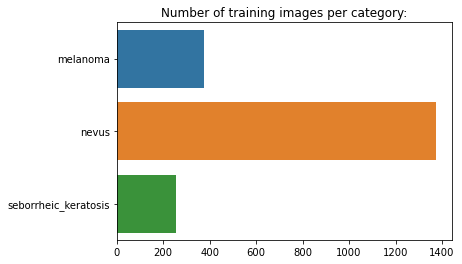

In [5]:
train_data_dir = "split_dataset/train"
val_data_dir = "split_dataset/valid"
test_data_dir = "split_dataset/test"
category_names = sorted(os.listdir('split_dataset/train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = 'split_dataset/train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [6]:
def plot_images(folder,n_row=4, n_col=4):    
    plt.figure(figsize=(3*n_col, 3*n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        subfolder = random.choice(os.listdir(folder))
        img_path = folder+'/'+subfolder
        files = os.listdir(img_path)
        index = random.randrange(0, len(files))
        plt.subplot(n_row, n_col, i+1)
        img = plt.imread(img_path+'/'+files[index])
        plt.imshow(img)
        plt.title(subfolder)
        plt.xticks(())
        plt.yticks(())

In [7]:
subfolder = random.choice(os.listdir(train_data_dir))
img_path = train_data_dir+'/'+subfolder
files = os.listdir(img_path)
index = random.randrange(0, len(files))

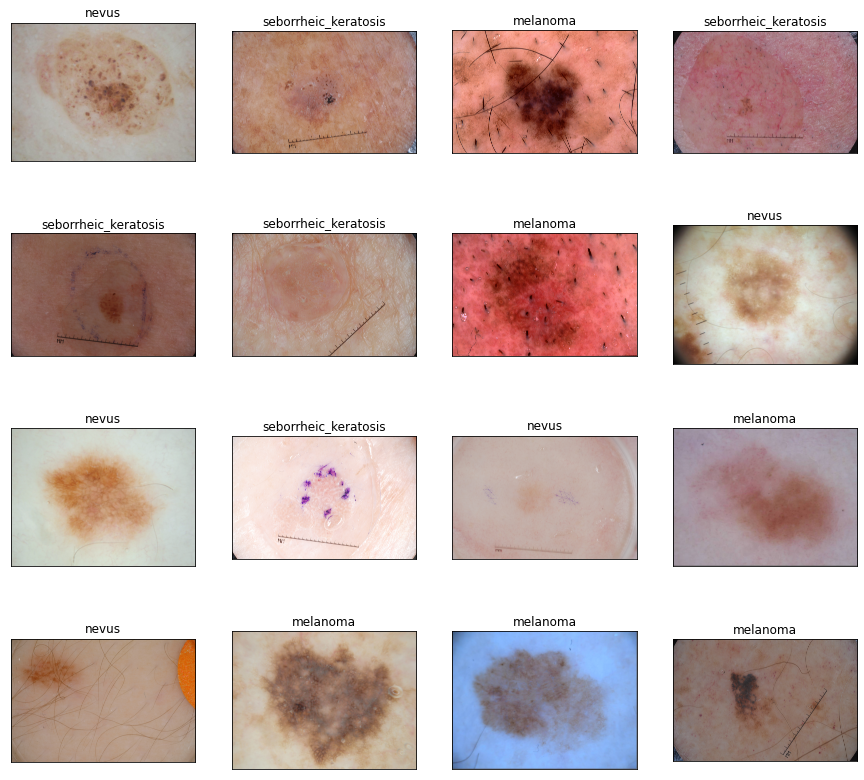

In [8]:
plot_images(train_data_dir)

In [9]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input

In [10]:
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

In [11]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 3)                 1539      
Total params: 14,716,227
Trainable params: 14,716,227
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#Number of images to load at each iteration
batch_size = 16
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 2000 images belonging to 3 classes.
Total number of images for "validation":
Found 150 images belonging to 3 classes.
Total number of images for "testing":
Found 600 images belonging to 3 classes.


In [16]:
learning_rate = 5e-5
epochs = 10
checkpoint = ModelCheckpoint("derma_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

In [17]:
history = model.fit(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[checkpoint]
                              )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 10 steps
Epoch 1/10
124/125 [============================>.] - ETA: 1s - loss: 0.8088 - acc: 0.6804
Epoch 00001: val_acc improved from -inf to 0.53333, saving model to derma_classifier.h5
125/125 [==============================] - 280s 2s/step - loss: 0.8108 - acc: 0.6810 - val_loss: 1.0260 - val_acc: 0.5333
Epoch 2/10
124/125 [============================>.] - ETA: 2s - loss: 0.7007 - acc: 0.7031
Epoch 00002: val_acc improved from 0.53333 to 0.64000, saving model to derma_classifier.h5
125/125 [==============================] - 289s 2s/step - loss: 0.7016 - acc: 0.7035 - val_loss: 0.7658 - val_acc: 0.6400
Epoch 3/10
124/125 [============================>.] - ETA: 1s - loss: 0.6235 - acc: 0.7329
Epoch 00003: val_acc improved from 0.64000 to 0.68000, saving model to derma_classifier.h5
125/125 [==============================] - 271s 2s/step - loss: 0.6230 - acc: 0.7325 - val_loss: 0.6976 - val_acc: 0.680

In [19]:
model = models.load_model("sign_classifier.h5")

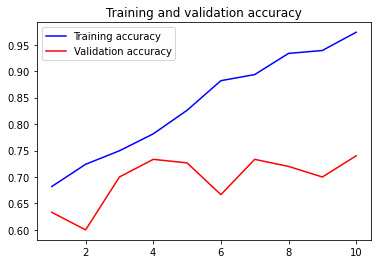

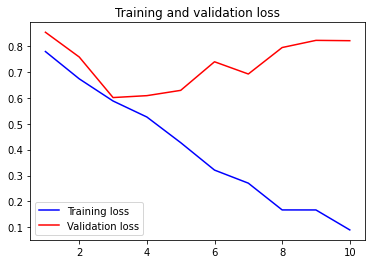

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Accuracy.jpg')
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [29]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)

In [22]:
cm

array([[ 25,  52,  40],
       [ 17, 318,  58],
       [  3,  17,  70]], dtype=int64)

In [99]:
test_generator.class_indices.keys()

dict_keys(['melanoma', 'nevus', 'seborrheic_keratosis'])

In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print (classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))
#print (confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                      precision    recall  f1-score   support

            melanoma       0.56      0.21      0.31       117
               nevus       0.82      0.81      0.82       393
seborrheic_keratosis       0.42      0.78      0.54        90

            accuracy                           0.69       600
           macro avg       0.60      0.60      0.56       600
        weighted avg       0.71      0.69      0.68       600



In [23]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 68.8% 


In [42]:
from sklearn.datasets import load_files
from tensorflow.keras import utils
def load_dataset_no_shuffle(path):
    data = load_files(path, shuffle=False)
    img_files = np.array(data['filenames'])
    img_targets = utils.to_categorical(np.array(data['target']), 3)
    return img_files, img_targets

In [43]:
test_files , test_labels = load_dataset_no_shuffle('split_dataset/test')

In [80]:
from sklearn.metrics import roc_curve, auc

In [51]:
print(np.argmax(Y_pred[100]))
print(y_pred[100])

0
0


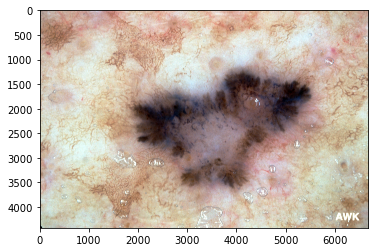

In [50]:
import cv2
img = cv2.imread(test_files[100])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [49]:
Y_pred_melanoma = Y_pred[:,0]
Y_pred_sebo = Y_pred[:,2]

In [74]:
#selecting only melonoma and sebo from ground truth
y_true_ms = test_labels[:,[0,2]]

In [75]:
#selecting only melonoma and sebo from prediction
y_pred_ms = Y_pred[:,[0,2]]

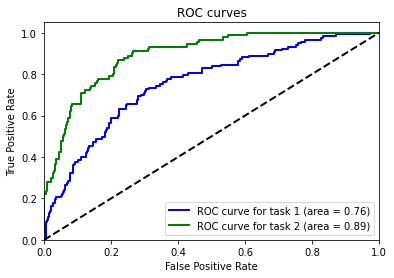

Category 1 Score: 0.755
Category 2 Score: 0.893
Category 3 Score: 0.824


In [88]:
fpr = dict()
tpr = dict()
roc_auc = np.zeros(3)
colors = ['blue', 'green']
for i in range(2):
    fpr[i], tpr[i], thresholds = roc_curve(y_true_ms[:,i], y_pred_ms[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                 label='ROC curve for task {d} (area = {f:.2f})'.format(d=i+1, f=roc_auc[i]))
roc_auc[2] = np.average(roc_auc[:2])
# format figure
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

# print scores
for i in range(3):
    print('Category {d} Score: {f:.3f}'. format(d=i+1, f=roc_auc[i]))


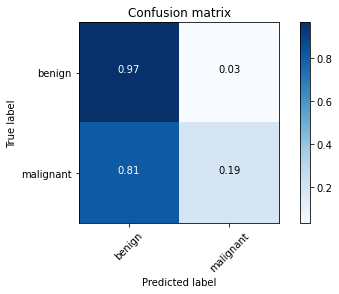

In [110]:
thresh = 0.5
classes = ['benign', 'malignant']
import itertools
y_pred = (y_pred>=thresh)*1
# obtain (unnormalized) confusion matrix
cm = confusion_matrix(y_true_ms[:,0], (y_pred_ms[:,0]>=thresh)*1)
# normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [86]:
roc_auc[2]

0.8242800360575296

In [117]:
X_new = np.linspace(0, 3, 600).reshape(-1, 1)




#plt.plot(X_new, y_pred_ms[:, 1], "g-", linewidth=2, label="Iris virginica")
#plt.plot(X_new, y_pred_ms[:, 0], "b--", linewidth=2, label="Not Iris virginica")


(array([[483.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 117.],
        [510.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  90.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 2 BarContainer objects>)

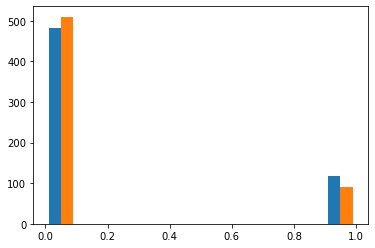

In [122]:
plt.hist(y_true_ms)

In [127]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6948000854282278097
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7129736807
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9816633824675418555
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
